In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [87]:
all_data = pd.read_csv('all_data.csv')
price = pd.read_csv('price.csv')
x_train = all_data[:num_train]
x_test = all_data[num_train:]
y_train = price

In [88]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

x1_train, x1_test, y1_train, y1_test = train_test_split(x_train, y_train, test_size=0.20, random_state=33)
print (x1_train.shape, y1_train.shape)
print (x1_test.shape, y1_test.shape)

(1165, 288) (1165,)
(292, 288) (292,)


C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mission\Anaconda3\l

[0.11155511292103799, 0.1090294427182404, 0.11732524215399434, 0.17630196915540405]


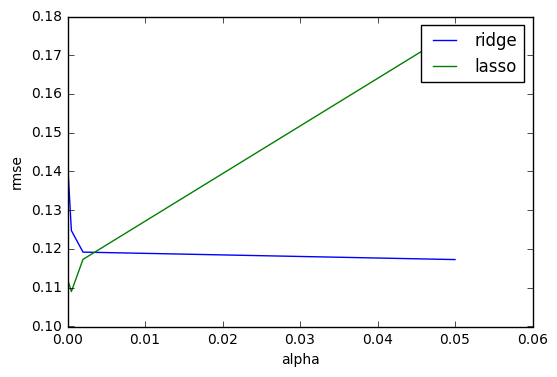

In [89]:
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="mean_squared_error", cv = 10))
    return(rmse)

alphas = [0.0001,0.0005,0.002,0.05]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()  for alpha in alphas]

cv_lasso = [rmse_cv(linear_model.Lasso(alpha = alpha, max_iter = 1500)).mean()  for alpha in alphas]
print(cv_lasso)

cv_ridge = pd.Series(cv_ridge, index = alphas)
plt.plot(alphas, cv_ridge)
plt.plot(alphas, cv_lasso)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.legend(['ridge','lasso'])
plt.show()

0.00851490408696
0.0156442124526


In [44]:
from sklearn.model_selection import GridSearchCV
#create regresion model
learning_rates = [0.2,0.05,0.01,0.015,0.003,0.0005]
max_depths = [3,6,9,16,20]
min_samples_splits =[50,100,200,400,800]

model_gbrt = GradientBoostingRegressor(n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10,min_samples_leaf=1)
param_grids = dict(learning_rate = learning_rates, max_depth = max_depths, min_samples_split= min_samples_splits)
param_grids1 = {'n_estimators':range(20,81,10)}

gsearch2 = GridSearchCV(estimator = model_gbrt, param_grid = param_grids)
grid2 = gsearch2.fit(x_train,y_train)
print("Best: %f using %s" % (grid2.best_score_, grid2.best_params_) )



Best: 0.894434 using {'max_depth': 16, 'learning_rate': 0.05, 'min_samples_split': 50}


In [81]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbrt = GradientBoostingRegressor(n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10,min_samples_leaf=1,
                                       learning_rate = 0.05,max_depth=16,min_samples_split = 50)
                                       
model_gbrt.fit(x1_train,y1_train)
y_pred_val = model_gbrt.predict(x1_test)
y_pred_train = model_gbrt.predict(x1_train)
y_pred_gbrt = model_gbrt.predict(x_test)
score_gbrt = mean_squared_error(y_pred_train,y1_train)
score_gbrt_val = mean_squared_error(y_pred_val,y1_test)
print(score_gbrt)
print(score_gbrt_val)

preds_gbrt = np.expm1(y_pred_gbrt)
solution = pd.DataFrame({"Id":test.Id, "SalePrice":preds_gbrt})
solution.to_csv("gbrt1.csv", index = False)

0.00275365175999
0.0202879973114


In [91]:
#### models selection

from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib

lasso = Lasso(alpha=0.0002,max_iter = 1500)

model = lasso

### prediction
model.fit(x1_train, y1_train)
y_pred_train = model.predict(x1_train)
y_pred_val = model.predict(x1_test)
score = (mean_squared_error(y1_train, y_pred_train)) 
score_val = (mean_squared_error(y1_test, y_pred_val)) 
print(score)
print(score_val)

preds_lasso = np.expm1(model.predict(x_test))
solution = pd.DataFrame({"Id":test.Id, "SalePrice":preds_lasso})
solution.to_csv("lasso.csv", index = False)


0.00820695254293
0.0139423893322


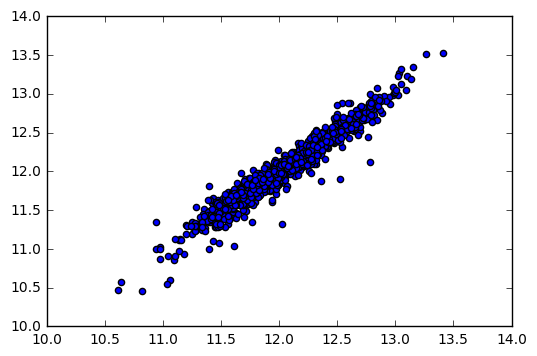

,predict_price,price,residuals
0,12.244804,12.247699,0.002895
1,12.165722,12.109016,-0.056705
2,12.288893,12.317171,0.028279
3,12.038876,11.849405,-0.189471
4,12.602679,12.429220,-0.173459
5,11.967356,11.870607,-0.096749
6,12.522798,12.634606,0.111808
7,12.273903,12.206078,-0.067826
8,11.737461,11.774528,0.037067
9,11.727079,11.678448,-0.048631


In [68]:
lasso = Lasso(alpha=0.0002,max_iter = 1500)
model = lasso

### prediction
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
#y_pred_val = model.predict(x1_test)
preds = pd.DataFrame({"predict_price":y_pred_train,"price":y_train})
preds["residuals"] = preds["price"] - preds["predict_price"]

plt.scatter(x = preds["predict_price"],y = preds["price"])
plt.show()
preds.head(10)

In [47]:
from sklearn.ensemble import RandomForestRegressor

#create regresion model
n_estimatorss = [100,200,400,800]
max_depths = [3,6,9,16,20]
min_samples_splits =[50,100,200,400,800]

model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=10,min_samples_leaf=1)
param_grids = dict( n_estimators = n_estimatorss  ,max_depth = max_depths, min_samples_split= min_samples_splits)
gsearchrf = GridSearchCV(estimator = model_gbrt, param_grid = param_grids)
gridrf = gsearchrf.fit(x_train,y_train)
print("Best: %f using %s" % (gridrf.best_score_, gridrf.best_params_) )



Best: 0.906958 using {'max_depth': 3, 'n_estimators': 800, 'min_samples_split': 200}


In [48]:
rf = RandomForestRegressor(n_estimators=400)
train_y = y_train
train_x = x_train
rf.fit(train_x, train_y)

y_train_rf = rf.predict(x_train)
y_pred_rf = rf.predict(x_test)
score = mean_squared_error(y_train_rf,y_train)
print(score)

preds_rf = np.expm1(y_pred_rf)
solution = pd.DataFrame({"Id":test.Id, "SalePrice":preds_rf})
solution.to_csv("rf1.csv", index = False)


0.00270249540331


In [49]:
from sklearn.linear_model import ElasticNet 

elast = ElasticNet(alpha = 0.0004)
elast.fit(x1_train, y1_train)
y_elast_train = elast.predict(x1_train)
y_elast_val = elast.predict(x1_test)
y_pred_elast = elast.predict(x_test)

score = mean_squared_error(y_elast_train,y1_train)
print(score)
score_val = mean_squared_error(y_elast_val,y1_test)
print(score_val)

preds_elast = np.expm1(y_pred_elast)
solution = pd.DataFrame({"Id":test.Id, "SalePrice":preds_elast})
solution.to_csv("elast0.csv", index = False)


0.00920629145977
0.022714741147


In [50]:
from sklearn.linear_model import BayesianRidge
BR = linear_model.BayesianRidge(alpha_1 = 0.004, alpha_2 = 0.004)
BR.fit (x1_train, y1_train)
y_br_train = BR.predict(x1_train)
y_br_val = BR.predict(x1_test)
y_br_pred = BR.predict(x_test)

score = mean_squared_error(y_br_train,y1_train)
print(score)
score_val = mean_squared_error(y_br_val,y1_test)
print(score_val)

y_br_pred = np.expm1(y_br_pred)
solution = pd.DataFrame({"Id":test.Id, "SalePrice":y_br_pred})
solution.to_csv("elast0.csv", index = False)

0.00957249878455
0.0248693966801


In [52]:
pred_result = (preds_gbrt + preds_rf + y_pred_ridge + preds_lasso + preds_elast + y_br_pred)/6
solution = pd.DataFrame({"Id":test.Id, "SalePrice":pred_result})
solution.to_csv("ensemble1.csv", index = False)